In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import os

In [2]:
import sys
sys.path.append('../')

In [3]:
from classes.Patient import  Patient
from classes.Dataset import Dataset

In [4]:
path = Path('../data')
for patient_dir in os.listdir(path):
    print(f"\'{Path.joinpath(path, patient_dir)}\',#", len(os.listdir(Path.joinpath(path, patient_dir))))

'..\data\Healthy_15M_4753',# 135
'..\data\Healthy_15M_4754',# 133
'..\data\Healthy_4M_4240',# 95
'..\data\Healthy_4M_4242',# 106
'..\data\Healthy_4M_4243',# 146
'..\data\Healthy_8M_4207',# 69
'..\data\Healthy_8M_4208',# 122
'..\data\Healthy_8M_4209',# 88
'..\data\Sick_15M_4270',# 155
'..\data\Sick_15M_4272',# 118
'..\data\Sick_15M_4771',# 63
'..\data\Sick_4M_4255',# 124
'..\data\Sick_4M_4256',# 168
'..\data\Sick_8M_3230',# 170
'..\data\Sick_8M_3231',# 56
'..\data\sigma',# 14


In [5]:
train_patient_paths = [   
'..\data\Sick_4M_4255',# 124
'..\data\Sick_15M_4771',# 63
'..\data\Sick_15M_4270',# 155
'..\data\Healthy_15M_4754',# 133
'..\data\Healthy_4M_4240',# 95
'..\data\Healthy_8M_4207',# 69
'..\data\Healthy_8M_4209',# 88
'..\data\Healthy_4M_4243',# 146
'..\data\Sick_4M_4256',# 168
]

test_patient_paths = [
# '..\data\Sick_8M_3230',# 170
'..\data\Sick_8M_3231',# 56
'..\data\Sick_15M_4272',# 118
'..\data\Healthy_8M_4208',# 122
'..\data\Healthy_15M_4753',# 135
'..\data\Healthy_4M_4242',# 106
]

In [6]:
train_dataset = Dataset(train_patient_paths)
test_dataset = Dataset(test_patient_paths)


In [7]:
train_dataset.load_data()
train_dataset.concat_data()

test_dataset.load_data()
test_dataset.concat_data()

100%|██████████| 106/106 [00:13<00:00,  7.97it/s]


In [8]:
train_dataset.summary_image

,patient_name,piece_image_path,class,summary_image_data
0,Sick_4M_4255,Sick_4M_4255img_104,1,class patient_path AreaOc...
1,Sick_4M_4255,Sick_4M_4255img_107,1,class patient_path AreaOc...
2,Sick_4M_4255,Sick_4M_4255img_108,1,class patient_path AreaOc...
3,Sick_4M_4255,Sick_4M_4255img_109,1,class patient_path AreaOc...
4,Sick_4M_4255,Sick_4M_4255img_117,1,class patient_path AreaOc...
...,...,...,...,...
163,Sick_4M_4256,Sick_4M_4256img_82,1,class patient_path AreaOcc...
164,Sick_4M_4256,Sick_4M_4256img_83,1,class patient_path AreaOcc...
165,Sick_4M_4256,Sick_4M_4256img_88,1,class patient_path AreaOcc...
166,Sick_4M_4256,Sick_4M_4256img_89,1,class patient_path AreaOcc...


In [9]:
train_df = pd.concat([x for x in train_dataset.summary_image.summary_image_data])
test_df = pd.concat([x for x in test_dataset.summary_image.summary_image_data])

for df in [train_df, test_df]: 
    df['avg_dendrite_area'] = df.apply(lambda x: x['AreaOccupied_AreaOccupied_secondary_dendrities'] / x['Count_secondary_dendrities'] if x['Count_secondary_dendrities'] != 0 else 0, axis=1)

print(len(train_df))
print(len(test_df))


1041
537


In [10]:

train_df_copy = train_df.copy().drop(columns=['patient_path','Metadata_FileLocation','Frame_input_illum','FileName_input_illum','PathName_input_illum','URL_input_illum','class','ImageSet_ImageSet','MD5Digest_input_illum']).fillna(0)
X_train = train_df_copy

y_train = train_df['class']


test_df_copy = test_df.copy().drop(columns=['patient_path','Metadata_FileLocation','Frame_input_illum','FileName_input_illum','PathName_input_illum','URL_input_illum','class','ImageSet_ImageSet','MD5Digest_input_illum']).fillna(0)
X_test = test_df_copy
y_test = test_df['class']

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = undersample.fit_resample(X_train, y_train)
X_test, y_test = undersample.fit_resample(X_test, y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
np.shape(X_train)


(1020, 93)

In [12]:
logreg = LogisticRegression(penalty='l1',solver='saga', C=0.7, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

d:\mainD\study\toolsTmp\myAnaconda\Anaconda\envs\codee\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.7, max_iter=1000, penalty='l1', solver='saga')

In [13]:

y_pred = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       174
           1       0.67      0.67      0.67       174

    accuracy                           0.67       348
   macro avg       0.67      0.67      0.67       348
weighted avg       0.67      0.67      0.67       348



<AxesSubplot:ylabel='Feature'>

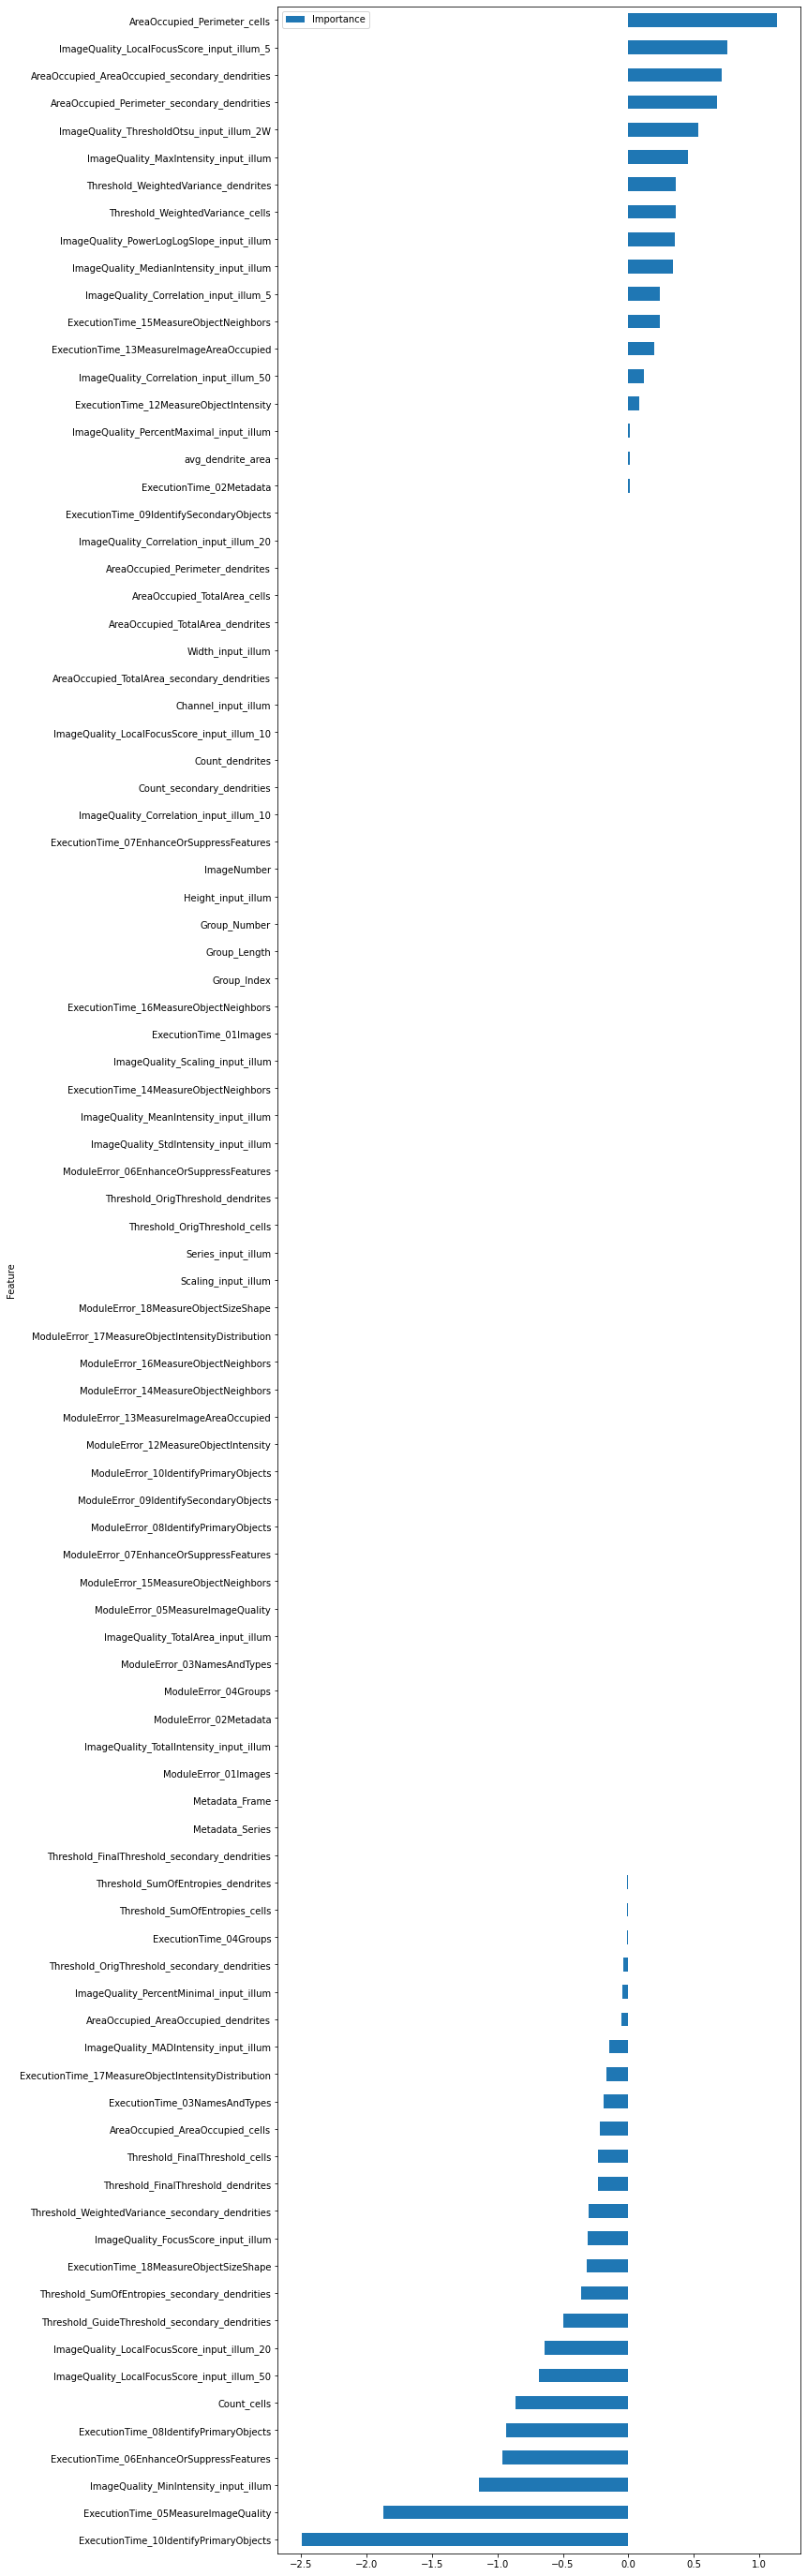

In [14]:

feature_importance = pd.DataFrame({'Feature': train_df_copy.columns, 'Importance': logreg.coef_[0]})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.iloc[:].plot(x='Feature', y='Importance', kind='barh', figsize=(10, 50))

**MLP**

In [15]:

import torch.nn as nn
import torch.nn.functional as F
import torch


class Net(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 48)
        self.fc2 = nn.Linear(48, 24)
        self.fc3 = nn.Linear(24, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.x, self.y = dataset        
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        X = self.x[idx]
        y = self.y[idx]
        return X, y
    
class MLPModel(nn.Module):
    def __init__(self, num_features, dropout=0.0, n_hid=48):
        super().__init__()
        self.model = nn.Sequential(
            nn.BatchNorm1d(num_features),
            nn.Linear(num_features, n_hid),
            nn.ReLU(),
            nn.Dropout(dropout),            
            nn.Linear(n_hid, n_hid // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            # nn.Linear(n_hid // 4, n_hid // 16),
            # nn.ReLU(),
            nn.Linear(n_hid // 2, 2),

        )
        # for m in self.model:
        #     if isinstance(m, nn.Linear):
        #         nn.init.kaiming_normal_(m.weight)
        #         nn.init.constant_(m.bias, 0)

    def forward(self, input_tensor):
        return self.model(input_tensor)

In [16]:
train_dataset = MyDataset((X_train_scaled, y_train.to_numpy()))
test_dataset = MyDataset((X_test_scaled, y_test.to_numpy()))
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=16,
                                          shuffle=True)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=16,
                                         shuffle=False)

In [25]:
import torch.optim as optim

net = Net(len(X_train.columns))
# net = MLPModel(len(X_train.columns))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [26]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        inputs = inputs.to(torch.float32)
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


In [27]:
predictions = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(torch.float32)

        # calculate outputs by running images through the network
        outputs = net(images)
        # print(outputs.data)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        # print(predicted)
        predictions.append(predicted.cpu().detach().numpy().tolist())



In [28]:
pred_flatten = [item for row in predictions for item in row]
print(pred_flatten)

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 

In [29]:
print(classification_report(y_test, pred_flatten))

              precision    recall  f1-score   support

           0       0.68      0.51      0.59       174
           1       0.61      0.76      0.68       174

    accuracy                           0.64       348
   macro avg       0.65      0.64      0.63       348
weighted avg       0.65      0.64      0.63       348



In [23]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e1, hidden_layer_sizes=(24,12), random_state=1,verbose=True, learning_rate="adaptive",learning_rate_init=0.001,early_stopping=True)

clf.fit(X_train_scaled, y_train.to_numpy())

Iteration 1, loss = 2.24194714
Validation score: 0.558824
Iteration 2, loss = 2.23473148
Validation score: 0.558824
Iteration 3, loss = 2.22407819
Validation score: 0.568627
Iteration 4, loss = 2.21161785
Validation score: 0.568627
Iteration 5, loss = 2.19830857
Validation score: 0.578431
Iteration 6, loss = 2.18477614
Validation score: 0.578431
Iteration 7, loss = 2.17114814
Validation score: 0.598039
Iteration 8, loss = 2.15784098
Validation score: 0.607843
Iteration 9, loss = 2.14474681
Validation score: 0.617647
Iteration 10, loss = 2.13174200
Validation score: 0.617647
Iteration 11, loss = 2.11936229
Validation score: 0.627451
Iteration 12, loss = 2.10710972
Validation score: 0.637255
Iteration 13, loss = 2.09512212
Validation score: 0.647059
Iteration 14, loss = 2.08343567
Validation score: 0.647059
Iteration 15, loss = 2.07194016
Validation score: 0.656863
Iteration 16, loss = 2.06080396
Validation score: 0.647059
Iteration 17, loss = 2.04986225
Validation score: 0.656863
Iterat

MLPClassifier(alpha=10.0, early_stopping=True, hidden_layer_sizes=(24, 12),
              learning_rate='adaptive', random_state=1, solver='sgd',
              verbose=True)

In [24]:
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test.to_numpy(), y_pred))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67       174
           1       0.67      0.67      0.67       174

    accuracy                           0.67       348
   macro avg       0.67      0.67      0.67       348
weighted avg       0.67      0.67      0.67       348

